## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [489]:
# reading the dataset
housing_df = pd.read_csv("train.csv")

In [490]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [491]:
# head
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; 

In [492]:
housing_df['MSSubClass']. value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [493]:
housing['GarageType']. astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [494]:
housing_df['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [495]:
housing_df['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [496]:
housing_df['Utilities'].astype('category').value_counts()
 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [497]:
housing_df['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [498]:
housing_df['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [499]:
housing_df['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [500]:
housing_df['Condition1'].astype('category').value_counts()
 

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [501]:
housing_df['Foundation'].astype('category').value_counts()
 

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

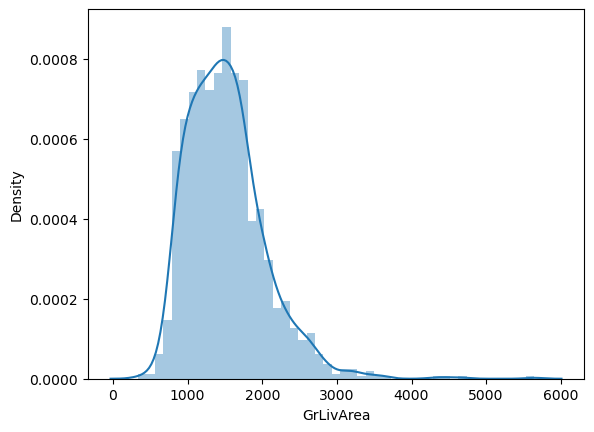

In [502]:
 
sns.distplot(housing_df['GrLivArea'])
plt.show()

In [503]:
housing_df['GrLivArea'].describe()
 

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

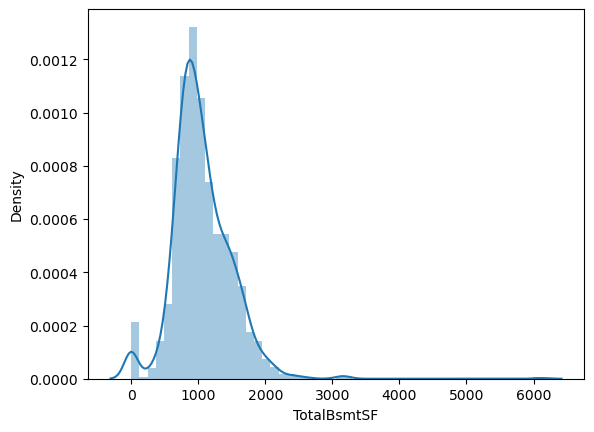

In [504]:
 
sns.distplot(housing_df['TotalBsmtSF'])
plt.show()

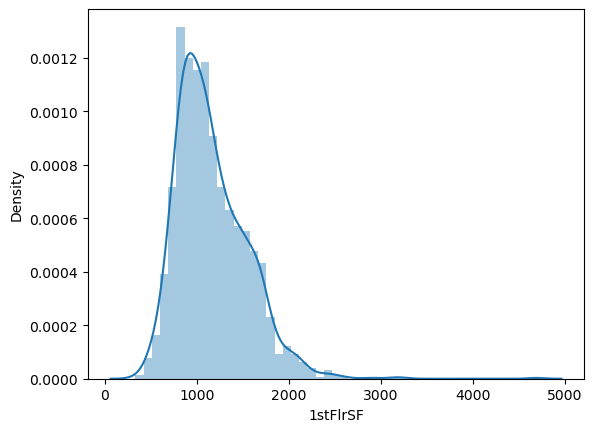

In [505]:
 
sns.distplot(housing_df['1stFlrSF'])
plt.show()

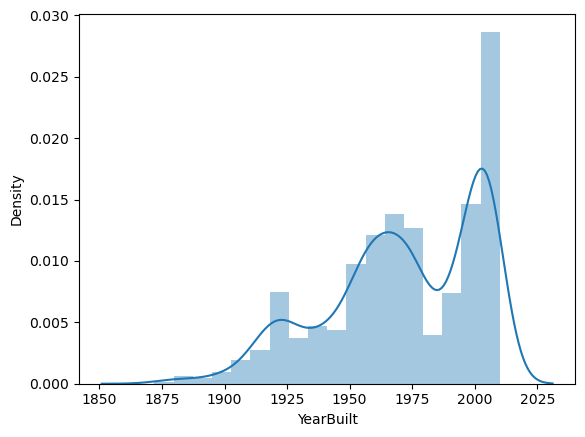

In [506]:
sns.distplot(housing_df['YearBuilt'])
plt.show()

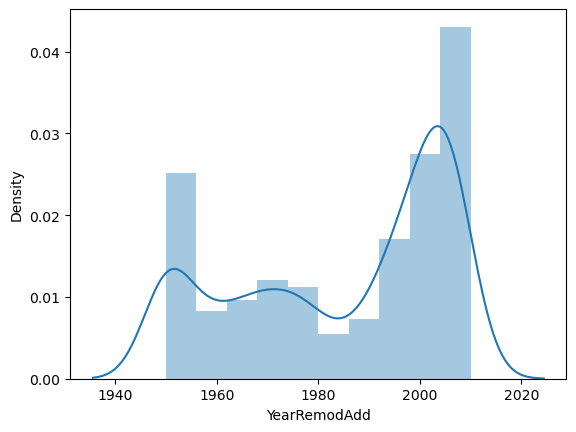

In [507]:
sns.distplot(housing_df['YearRemodAdd'])
plt.show()

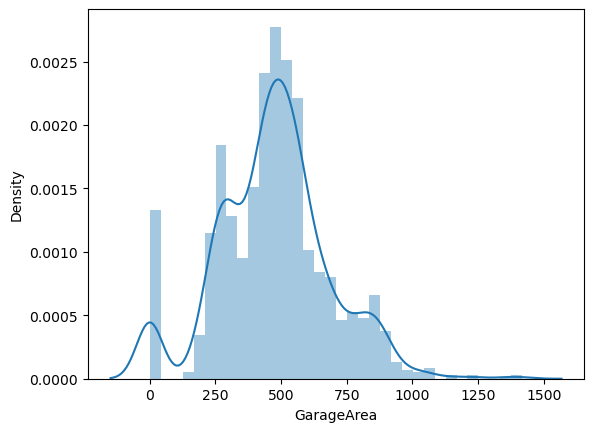

In [508]:
sns.distplot(housing_df['GarageArea'])
plt.show()

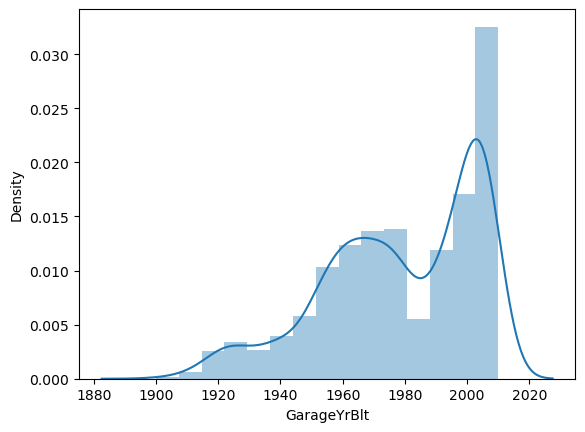

In [509]:
sns.distplot(housing_df['GarageYrBlt'])
plt.show()

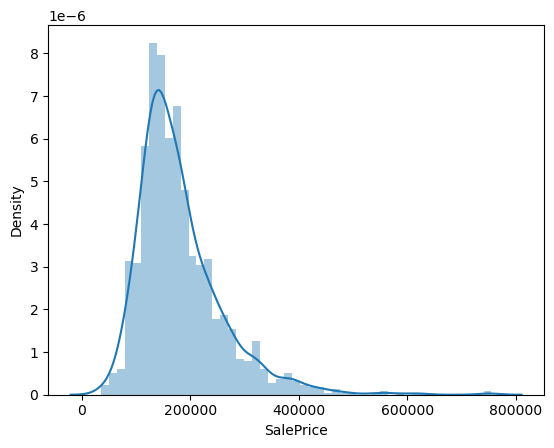

In [510]:

sns.distplot(housing_df['SalePrice'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [511]:
housing_numeric=housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


##  ID has to be deleted. 

In [512]:
# dropping categorical variables
housing_numeric = housing_numeric.drop([ 'Id' ], axis=1)
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [513]:
#checking for nulls
housing_numeric.isnull().sum() 

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [514]:
# correlation matrix
cor = housing_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


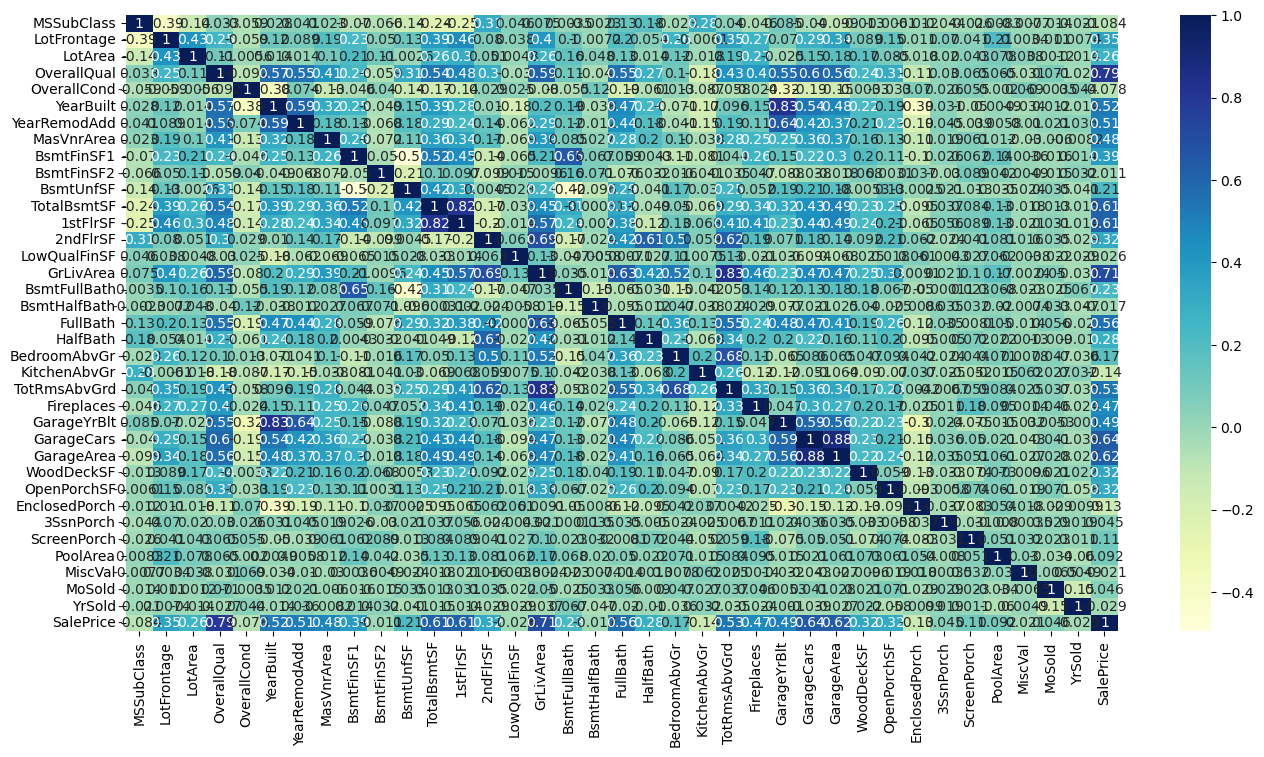

In [515]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()
 



Correlation of price with independent variables:
- TotalBsmtSF',
- 'YearBuilt',
- 'GrLivArea',
- '1stFlrSF',
- 'YearBuilt', 
- 'YearRemodAdd',  
- 'GarageArea'  

Correlation among independent variables:
- #1stFlrSF and TotalBsmtSF are highly correlated
- #TotRmsAbvGrd and GrLivArea are highly correlated
- #fullbath and GrLivArea are highly correlated
- #garagecars and garagearea are highly correlated

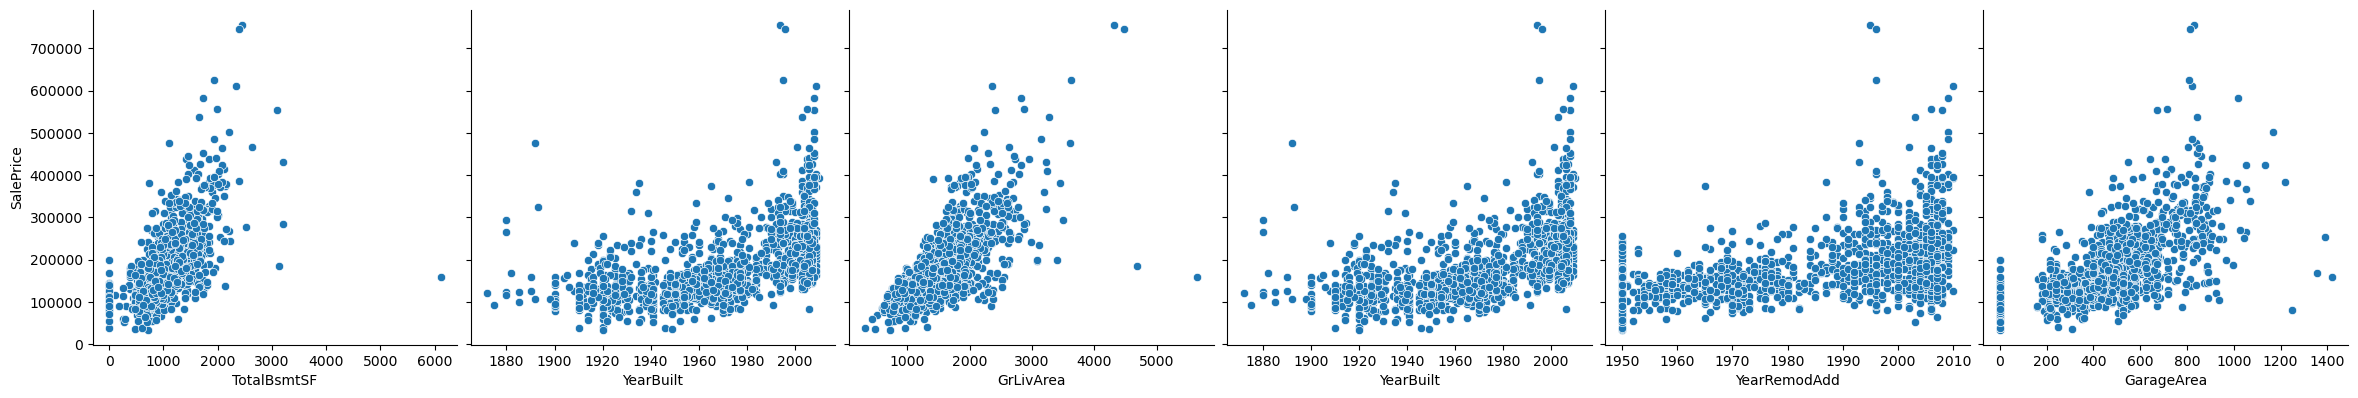

In [516]:
#Pairplot of independent variables with salesprice
sns.pairplot(housing_numeric, x_vars=[ 'TotalBsmtSF', 'YearBuilt','GrLivArea', 'YearBuilt',
                                      'YearRemodAdd',  'GarageArea'], y_vars='SalePrice',size=4, aspect=1, kind='scatter') 
plt.show()


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 
Aggregate Yearbuilt and YearRemodAdd into decades to make it simpler.


In [517]:
#housing=housing_df[housing_df.GrLivArea < 3124 ] # ignoring outliers
housing=housing_df
 
housing['DecadeBuilt']=(housing['YearBuilt'] // 10) * 10


housing['RemodAddDecade']=(housing['YearRemodAdd'] // 10) * 10
  
 

In [518]:
housing.DecadeBuilt.value_counts()
 

2000    387
1970    188
1960    175
1950    167
1990    163
1920     97
1940     79
1980     61
1910     58
1930     54
1900     15
1880      7
1890      6
1870      2
2010      1
Name: DecadeBuilt, dtype: int64

In [519]:
# converting  to categorical
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['DecadeBuilt'] = housing['DecadeBuilt'].astype('object')
housing['RemodAddDecade'] = housing['RemodAddDecade'].astype('object')

 

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [520]:
  # split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning',   'HouseStyle', 'Neighborhood',
       'OverallCond',   'GrLivArea',
       'TotalBsmtSF',  'DecadeBuilt', 'RemodAddDecade' , 'GarageArea'
                 , 'BsmtQual', 'Utilities', 'Electrical','ExterCond'
                    ,'BsmtExposure','BsmtFinType1','LandContour','GarageFinish' ,'MiscFeature'  ,'Functional' 
                       # ,'YearBuilt'                   
                     #,'Condition1'
                   # ,'ExterCond'
                    #,'MoSold','Utilities', 
                   # ,'HeatingQC','BsmtQual','ExterCond',,'Utilities', 'Condition1','BsmtExposure','BsmtFinType1',
                   # ,'Heating','CentralAir',
                    #'Electrical','MoSold'
       ]] # predictors in variable X

In [521]:
y = housing['SalePrice'] 

In [522]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()


,MSSubClass,MSZoning,HouseStyle,Neighborhood,OverallCond,DecadeBuilt,RemodAddDecade,BsmtQual,Utilities,Electrical,ExterCond,BsmtExposure,BsmtFinType1,LandContour,GarageFinish,MiscFeature,Functional
0,60,RL,2Story,CollgCr,5,2000,2000,Gd,AllPub,SBrkr,TA,No,GLQ,Lvl,RFn,NaN,Typ
1,20,RL,1Story,Veenker,8,1970,1970,Gd,AllPub,SBrkr,TA,Gd,ALQ,Lvl,RFn,NaN,Typ
2,60,RL,2Story,CollgCr,5,2000,2000,Gd,AllPub,SBrkr,TA,Mn,GLQ,Lvl,RFn,NaN,Typ
3,70,RL,2Story,Crawfor,5,1910,1970,TA,AllPub,SBrkr,TA,No,ALQ,Lvl,Unf,NaN,Typ
4,60,RL,2Story,NoRidge,5,2000,2000,Gd,AllPub,SBrkr,TA,Av,GLQ,Lvl,RFn,NaN,Typ


In [523]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageFinish_Unf,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [524]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [525]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [526]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75',
       ...
       'GarageFinish_Unf', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Sev',
       'Functional_Typ'],
      dtype='object', length=114)

In [527]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting house prices, a dataset using linear regression.

In [528]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [529]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

179831.0637843225
[ 3.45242609e+04  5.48578432e+03  5.41304953e+03  7.29018073e+02
  7.87457795e+01 -7.72598725e+02  1.38224225e+03 -1.15434309e+02
  1.76305687e+03  1.19846511e+03 -3.15391308e+03 -3.35528741e+03
 -7.04677259e+03 -5.19976352e+03 -6.41445356e+03 -4.04294617e+03
 -2.37878832e+03  4.51749611e+03  2.46174891e+03  1.26546614e+04
  1.02407347e+04  2.15752459e+03  4.30709041e+03 -2.92826270e+03
 -6.64335507e+01 -1.23274466e+03  5.33990760e+03  3.44048912e+03
  1.59927933e+02  9.51785237e+02 -3.96762831e+03  6.32933738e+01
  2.97006246e+02  4.22447649e+03 -8.83080617e+03 -1.13659237e+03
 -2.94820869e+03 -8.83416284e+02 -3.67218172e+03 -5.99445236e+03
  1.85428281e+03 -9.62017775e+02  9.69018255e+03  1.17566755e+04
 -6.21013263e+03 -1.44419972e+03 -4.08637532e+03 -1.00297535e+03
  8.93116022e+03  5.88847097e+03  5.14664390e+02  2.51400099e+03
  2.30256447e+03  6.82396689e+03  1.14037479e+04  3.07275012e+04
  2.67691082e+04  2.63126492e+04  1.74273479e+04  1.21292617e+04
  4.074

In [530]:
from sklearn.metrics import r2_score, mean_squared_error

In [531]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8551388013064839
0.828567436499822
924315676594.5273
483219114848.02856
905304286.5764225
1103239988.237508


## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [532]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [533]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [534]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [535]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.56786840e+04  9.80790424e+03  8.02228397e+03 -1.03993969e+03
  1.78667742e+02 -3.66993681e+02 -1.21951101e+02  2.37037523e+03
  5.74952637e+02  8.97014087e+02 -6.56997572e+02 -1.32117943e+03
 -5.03452655e+03 -3.97330148e+03 -4.56260045e+03 -2.04000234e+03
 -2.51627468e+03  6.10744792e+02  2.08940645e+02  3.07733678e+03
  4.32632431e+02  4.64913278e+02  6.84453195e+02 -2.08505908e+03
 -2.81277193e+02 -9.50626211e+02  8.29658256e+02 -2.44711585e+02
  2.97868963e+02  7.08456289e+02 -2.42378173e+03  8.08917826e+02
 -4.82704664e+02  4.94349468e+03 -7.17396392e+03 -1.16171710e+03
 -2.76986684e+03 -9.30917395e+02 -2.85406504e+03 -4.19972071e+03
  1.13067123e+03 -2.58520310e+02  9.92683136e+03  1.09329571e+04
 -4.22239192e+03 -1.07937304e+03 -3.03806039e+03 -6.78337229e+02
  6.43707202e+03  5.17631560e+03  1.10408167e+03  2.53963288e+03
 -1.90730944e+03 -2.14992339e+03 -1.60912611e+03 -1.83614030e+03
  9.88404306e+02  2.42437654e+03  1.61970377e+03  4.04133992e+03
 -2.95688205e+02 -6.97660

In [536]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8469404502798275
0.8270191482203201
976626885148.0059
487583294422.0552
956539554.5034337
1113203868.543505


## Lasso

In [537]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [538]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [539]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [540]:
lasso.coef_

array([ 3.12970755e+04,  8.05149023e+03,  6.97787485e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -5.86973761e+03, -3.02861323e+03, -4.28292504e+03, -1.24298998e+03,
       -2.64583812e+03, -0.00000000e+00, -0.00000000e+00,  2.74091818e+03,
       -0.00000000e+00,  3.83191682e+02,  1.88024456e+03, -2.05059414e+03,
       -0.00000000e+00, -0.00000000e+00,  9.81388395e+01, -0.00000000e+00,
        0.00000000e+00,  4.77575823e+02, -1.14764960e+03,  7.15159811e+02,
        7.74049235e+02,  5.00090235e+03, -6.59004561e+03, -0.00000000e+00,
       -1.71355972e+03, -2.12613216e+02, -1.64817198e+03, -2.97867304e+03,
        7.44329678e+02,  0.00000000e+00,  1.03230580e+04,  1.18211391e+04,
       -3.41293186e+03, -4.16985964e+02, -1.86631797e+03,  0.00000000e+00,
        7.79028706e+03,  5.26184047e+03,  9.88709993e+02,  2.55504461e+03,
       -1.26597940e+03, -

In [541]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.847349980705459
0.8324592136845249
974013794852.829
472249313732.1749
953980210.4337208
1078194780.210445


In [542]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.551388e-01,8.469405e-01,8.473500e-01
1,R2 Score (Test),8.285674e-01,8.270191e-01,8.324592e-01
2,RSS (Train),9.243157e+11,9.766269e+11,9.740138e+11
3,RSS (Test),4.832191e+11,4.875833e+11,4.722493e+11
4,MSE (Train),3.008827e+04,3.092797e+04,3.088657e+04
5,MSE (Test),3.321506e+04,3.336471e+04,3.283588e+04


##  Changes in the coefficients after regularization

In [484]:
betas = pd.DataFrame(index=X.columns)

In [485]:
betas.rows = X.columns

In [543]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [544]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
GrLivArea,3.452426e+04,25678.683966,31297.075544
TotalBsmtSF,5.485784e+03,9807.904245,8051.490227
GarageArea,5.413050e+03,8022.283974,6977.874850
MSSubClass_30,7.290181e+02,-1039.939687,-0.000000
MSSubClass_40,7.874578e+01,178.667742,0.000000
MSSubClass_45,-7.725987e+02,-366.993681,0.000000
MSSubClass_50,1.382242e+03,-121.951101,-0.000000
MSSubClass_60,-1.154343e+02,2370.375233,0.000000
MSSubClass_70,1.763057e+03,574.952637,-0.000000
MSSubClass_75,1.198465e+03,897.014087,0.000000
